In [7]:
# Installing Required Libraries and Import Moving Average Model
import pandas as pd
import numpy as np
from moving_average_model import moving_average

In [8]:
# Data processing 
data = "walmart-sales-dataset-of-45stores.csv"

df = pd.read_csv(
    data, sep=';', 
    on_bad_lines='skip', 
    parse_dates=['Date'], 
    dayfirst={'Store':str}
) 

df.tail()

,Store,Date,Weekly_Sales
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53
6434,45,2012-10-26,760281.43


In [9]:
df.columns = ['Store', 'ds', 'y']
df.head()

,Store,ds,y
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [10]:
# Creating an empty dataframe to store the final data 
df_final = pd.DataFrame()


# Loop for all categories
for store in df.Store.unique():
    df_base = df[df['Store'] == store].reset_index(drop=True)
    
    # Model implementation
    m = moving_average(df=df_base, periods=12)

    future = m.make_future_dataframe()
    
    df_predict = m.predict(
        future=future, 
        response_col='y', 
        window=3,
        dimension_col=True, 
        dimension_col_name='Store'
    )
    
    df_final = pd.concat((df_final, df_predict), ignore_index=True)

<Axes: xlabel='ds'>

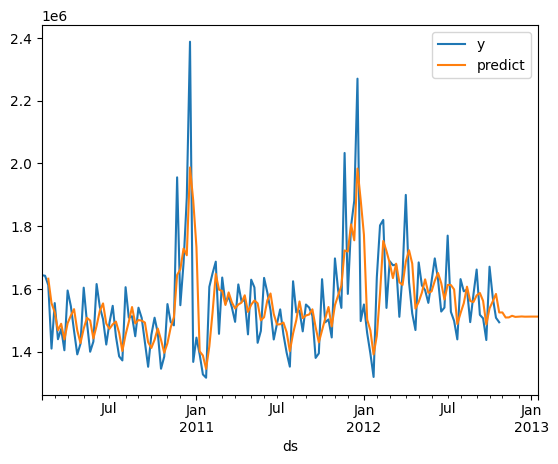

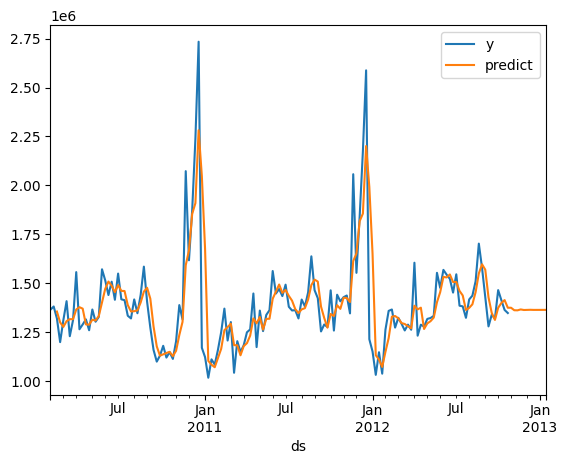

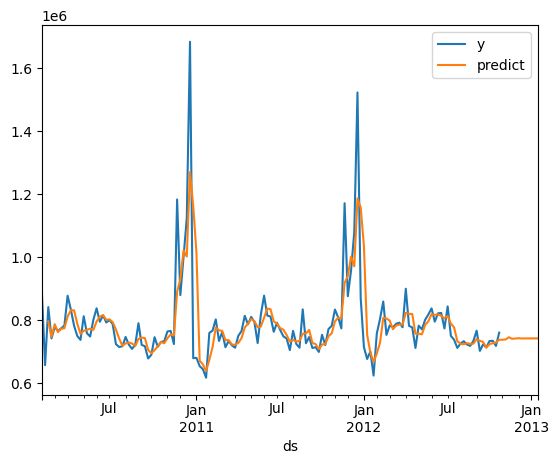

In [16]:
# Plotting examples of the result
df_final[df_final['Store'] == df.Store.unique()[0]].plot(x='ds', y=['y', 'predict'])
df_final[df_final['Store'] == df.Store.unique()[22]].plot(x='ds', y=['y', 'predict'])
df_final[df_final['Store'] == df.Store.unique()[44]].plot(x='ds', y=['y', 'predict'])